### Projeto de Embedding aplicado

O objetivo aqui é tentar colocar em uso o que foi aprendido no projeto [de embedding](./Tensorflow_Embedding.ipynb).
Aqui temos como objetivo:

    1 - Carregar uma base de dados real de mensagens.
    2 - Aplicar o embedding multilingual na base de dados.
    3 - Aplicar K-MEANS nos vetores gerados. 
    4 - Verificar o resultado no projetor do tensorflow*

[*: projetor do tensorflow](http://projector.tensorflow.org/)

In [1]:
import tensorflow_hub as hub
import numpy as np
import tensorflow_text

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

#### Carregando e limpando os dados

Aqui em baixo faço uma limpeza bem básica que tem mais haver com a formatação do arquivo. Não preciso fazer mais que isso porque o modelo usa o tensorflow_text para tratar o resto.

In [34]:
data = []
with open("./datasets/nova_acrop.csv", encoding="utf-8") as file:
    data = [line for line in file if not line.isnumeric()]
data = data[1:]
data = [phrase.replace("\n","") for phrase in data]
data = [phrase.replace("\"","") for phrase in data]
data = [phrase for phrase in data if not phrase.isnumeric()]
data[:10],len(data)

(['Olá! Vcs têm aplicativo referente aos cursos?',
  'Olá!',
  'Olá',
  'Olá!',
  'Palestra REFLEXÕES PARA PERCEBER A BELEZA',
  'PALESTRA',
  'são paulo',
  'Olá!',
  'bom dia',
  'Bom dia'],
 2863)

In [35]:
output = embed(data)

#### Aplicando KMEANS

Aqui aplico o [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) para clusterização das frases selecionadas. Roda bem rápido.

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20,random_state=0).fit(output.numpy())

Abaixo, uma breve representação de como os metadados estão configurados.

In [37]:
def save_tesor(tensor, metadata):
    output = ""
    tensor = tensor.numpy()
    for i in range(tensor.shape[0]):
        for j in range(tensor.shape[1]):
            output += str(tensor[i,j]) + "\t"
        output += "\n"
    with open("tensor.tsv", "w", encoding="utf-8") as file:
        file.write(output)
    with open("metadata.tsv", "w", encoding="utf-8") as file:
        file.write("\n".join(["\t".join(row) for row in metadata]))
        
save_tesor(output, [["phrases", "colors"]] + [[data[i],str(kmeans.labels_[i])] for i in range(len(kmeans.labels_))])

In [38]:
[["phrases", "colors"]] + [[data[i],kmeans.labels_[i]] for i in range(len(kmeans.labels_))][:10]

[['phrases', 'colors'],
 ['Olá! Vcs têm aplicativo referente aos cursos?', 6],
 ['Olá!', 3],
 ['Olá', 3],
 ['Olá!', 3],
 ['Palestra REFLEXÕES PARA PERCEBER A BELEZA', 16],
 ['PALESTRA', 2],
 ['são paulo', 17],
 ['Olá!', 3],
 ['bom dia', 0],
 ['Bom dia', 0]]

### Demonstração

Apesar dos clusters terem ficado um tanto que evidente, ainda existe muita mistura. Maioria das frases se confunde no gráfico, o método visual não parece ser muito efetivo. A pergunta que fica é "o que fazer ?" ou "como separar melhor esses dados?". Infelizmente o tensorflowhub não apresenta muitos modelos de embedding pt-br.

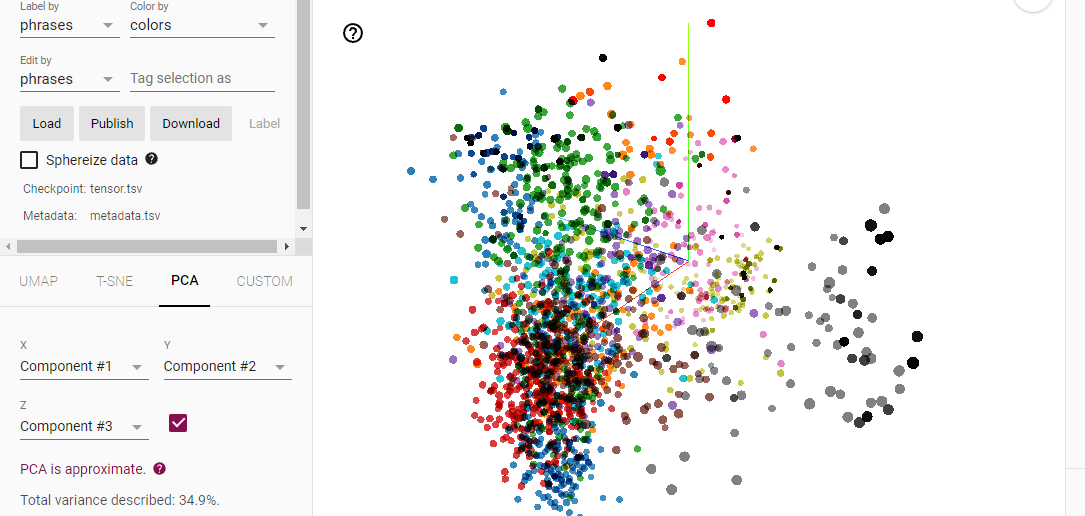

Os resultados também mostram que muitas intenções podem sim ser identificadas. Quando observamos em formato de tabela observamos algum desses casos

In [51]:
def show_first_n(class_sample,n=10):
    print("\n".join([data[i] + " " +str(kmeans.labels_[i])  for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == class_sample][:n]))

#### Intenção de cursos.

In [53]:
show_first_n(6)

Olá! Vcs têm aplicativo referente aos cursos? 6
Conhecendo Platão. Curso on line. Já fiz minha inscrição 6
Gostaria de saber o valor do curso? 6
Olá!quero assistir todos os cursos 6
Sobre o curso 6
O site de vocês divulga apenas cursos presenciais e aulas on-line enquanto não for possível atividades presenciais.  6
Haveria a possibilidade de eu acompanhar a distância o curso de alguma turma de qualquer lugar do Brasil? 6
Olá! Gostaria de fazer um curso on LINE com vcs? Como posso fazer? As aulas ficam gravadas? 6
Olá!como faco para conhecer os cursos e adquirir os que estão disponíveis ? 6
Pelo boleto você poderia identificar o curso? 6


#### Intenção de confirmar

In [54]:
show_first_n(10)

Sim 10
Sim, 61... 10
nao, muito obrigado 10
Sim 10
Ainda não... 10
Sim 10
Sim 10
Ah sim 10
E tem 10
Sim 10


#### Intenção associada com professora Lúcia (Ou não)

In [57]:
show_first_n(14)

Por favor qual a data da palestra “Qual a minha missão na vida?” Prof Lucia Helena. 14
13 peça teatral   Helena  Blavatsky. 14
A prof. Lúcia H. Galvão, pode falar de Adão e Eva? 14
A prof. Lúcia H. Galvão, falar de Adão e Eva. 14
Me chamo Renata e estou apaixonada pelas palestras da Nova Acrópole com a professora Luiza Helena Galvão 14
Gostaria de saber como faço para participar das aulas da Professora Lúcia! 14
Estou Assistindo os Vídeos  no YouTube,  Estou Gostando, Assimilando  Muito as Aulas. 14
- estou lendo O Louco de Kalil Gibran e estou tendo dificuldades para entender nas entrelinhas como vcs costumam dizer.  Gostaria de saber se tem palestras sobre esse livro,  pois , achei só o do Profeta? 14
Estou Assistindo os Vídeos  no YouTube,  Estou Gostando, Assimilando  Muito as Aulas. 14
Olá! Gostaria de sugerir uma conversa com a Lucia Helena 14


#### Intenção voltar ao menu

In [58]:
show_first_n(18)

Menu 18
Menu 18
Menu 18
Menu 18
Menu 18
Menu 18
menu 18
Voltar ao Menu 18
Menu inicial 18
Menu 18
